In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


# Import csv data 
Biz_df = pd.read_csv("Raw_Data/BusinessAnalyst.csv") 
Biz_df.head() 

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [42]:
# check for null values
Biz_df.isnull()

# data info
Biz_df.info()

# get descriptive statistics
Biz_df.describe()

# get the number of row and columns 
Biz_df.shape

# check the columns 
Biz_df.columns

# drop null values
Biz_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3687,4395,Pega Business Analyst,$58K-$103K (Glassdoor est.),• 5 yrs relevant experience in:- Experience wi...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,2005,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1
3688,3688,4396,Jr.Business Analyst,$58K-$103K (Glassdoor est.),Job Description\n\nNew businesses are making t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3689,3689,4397,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),Title: Business Process Analyst\nDuration: 4+ ...,-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
3690,3690,4398,"AVP, Business System",$58K-$103K (Glassdoor est.),We are looking for a AVP Business System Analy...,3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1


In [43]:
# Cleaning and replacing some characters and numerics 
Biz_df['Avg_Salary'] = Biz_df['Salary Estimate'].str.replace(r'\(Glassdoor est.\)','', regex= True)
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace(r'\(Employer est.\)','', regex= True)
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('$','')
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('K','')

# split the numbers in order to do the average 
Biz_df['Avg_Salary'].str.split('-')
Biz_df['Avg_Salary']= Biz_df['Avg_Salary'].str.split('-')

# create function that will return the average
def salary_average(x):
    if len(x) == 1:
        value = x[0]
    else: 
        value =((0 if x[0] == '' else float(x[0]))+ float(x[1])/len(x))
    return value

# using the apply method to get the avg 
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].apply(salary_average)

# convert to float
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].astype(float)

# cleaning company name column 
Biz_df['Company Name'] = Biz_df['Company Name'].str.replace('\d+', '', regex=True)
Biz_df['Company Name']= Biz_df['Company Name'].str.replace('\n.', '', regex= True)

# Replace all the -1 or -1.0 or '-1' to NaN in all columns 
Biz_df['Easy Apply'] = Biz_df['Easy Apply'].replace('True',1)
Biz_df = Biz_df.replace(-1,np.nan)
Biz_d = Biz_df.replace('-1.0',np.nan)
Biz_df = Biz_df.replace('-1',np.nan) 


# check for values in rating 
Biz_df['Rating'].value_counts(ascending=True) 

rating_clean = ['-1.0','Jacksonville, FL','Orange Park, FL','Jacksonville Beach, FL',
            'Mayport, FL', 'Ponte Vedra Beach, FL', 'Fleming Island, FL']

def clean_rating(x):
    if x in rating_clean:
        return np.nan
    else:
        return x 

Biz_df['Rating'] = Biz_df['Rating'].apply(clean_rating) 

# convert to float
Biz_df['Rating'] = Biz_df['Rating'].astype(float)


# check for values in Founded 
Biz_df['Founded'].value_counts(ascending=True) 

founded_clean = ['Accounting', 'Advertising & Marketing', 'Aerospace & Defense', 'Architectural & Engineering Services', 'Banks & Credit Unions', 
'Biotech & Pharmaceuticals', 'Building & Personnel Services', 'Colleges & Universities', 'Computer Hardware & Software', 'Consulting', 
'Department, Clothing, & Shoe Stores', 'Education Training Services', 'Energy', 'Enterprise Software & Network Solutions', 'Federal Agencies',
'Financial Transaction Processing', 'Health Care Products Manufacturing', 'Health Care Services & Hospitals', 'Home Centers & Hardware Stores', 
'Insurance Carriers', 'Real Estate', 'Religious Organizations', 'Shipping', 'Sports & Recreation', 'Staffing & Outsourcing', 'Telecommunications Services', 
'Timber Operations', 'Investment Banking & Asset Management', 'IT Services', 'Lending', 'Logistics & Supply Chain', 'Moving Services', 'Rail',
'Transportation Management', 'Vehicle Dealers', 'Wholesale' ]

def clean_founded(x):
    if x in founded_clean:
        return np.nan
    else:
        return x 

Biz_df['Founded'] = Biz_df['Founded'].apply(clean_founded) 
Biz_df['Founded'] = Biz_df['Founded'].astype(float)



# Split salary into two columns min salary and max salary.
Biz_df['Min_Salary'], Biz_df['Max_Salary']= Biz_df['Salary Estimate'].str.split('-').str
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].str.replace(r'\(Glassdoor est.\)','', regex= True)
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].str.replace(r'\(Employer est.\)','', regex= True)
Biz_df['Min_Salary'] = Biz_df['Min_Salary'].str.replace('$','')
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].str.replace('$','')

# clean revenue column 
Biz_df['Revenue']= Biz_df['Revenue'].str.replace(r'\((USD)\)','', regex= True)
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('Less than','')
Biz_df['Revenue']= Biz_df['Revenue'].str.replace('to','-')
Biz_df['Revenue']= Biz_df['Revenue'].replace('Unknown / Non-Applicable',np.nan)

# turning min_salary, max_salary and avg_salary to thousands
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0

Biz_df['Min_Salary'] = Biz_df['Min_Salary'].apply(value_to_float)
Biz_df['Max_Salary'] = Biz_df['Max_Salary'].apply(value_to_float)

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x * 1000
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].apply(value_to_float)


#add column that contains Job_id
Biz_df = Biz_df.assign(Job_id=range(len(Biz_df)))
job_id = Biz_df.pop('Job_id')
Biz_df.insert(0, 'Job_id', job_id)

#add column that contains company_id
Biz_df = Biz_df.assign(Company_id=range(len(Biz_df)))
company_id = Biz_df.pop('Company_id')
Biz_df.insert(7, 'Company_id', company_id)

#add column that contains state_id
Biz_df = Biz_df.assign(State_id=range(len(Biz_df)))
state_id = Biz_df.pop('State_id')
Biz_df.insert(22, 'State_id', state_id)

# Spliting location into city and state
Biz_df[['City','State']] = Biz_df['Location'].str.split(', ',expand=True).drop([2],axis=1)
Biz_df['State'] = Biz_df['State'].str.replace('Los Angeles','CA')

Biz_df['HeadquarterCity'],Biz_df['Headquarter'] = Biz_df['Headquarters'].str.split(', ',1).str

Biz_df['Sector'].astype(str)
Biz_df['Company Name'].astype(str)






Biz_df.head()

/var/folders/t8/9qqw45pj2ns236fmzm2y_lfr0000gp/T/ipykernel_8827/1774147143.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('$','')
/var/folders/t8/9qqw45pj2ns236fmzm2y_lfr0000gp/T/ipykernel_8827/1774147143.py:77: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Biz_df['Min_Salary'], Biz_df['Max_Salary']= Biz_df['Salary Estimate'].str.split('-').str
/var/folders/t8/9qqw45pj2ns236fmzm2y_lfr0000gp/T/ipykernel_8827/1774147143.py:80: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df['Min_Salary'] = Biz_df['Min_Salary'].str.replace('$','')
/var/folders/t8/9qqw45pj2ns236fmzm2y_lf

,Job_id,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company_id,Company Name,Location,...,Competitors,Easy Apply,Avg_Salary,Min_Salary,Max_Salary,State_id,City,State,HeadquarterCity,Headquarter
0,0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,0,Memorial Sloan-Kettering,"New York, NY",...,"Mayo Clinic, The Johns Hopkins Hospital, MD An...",NaN,107000.0,56000.0,102000.0,0,New York,NY,New York,NY
1,1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,1,Paine Schwartz Partners,"New York, NY",...,NaN,1.0,107000.0,56000.0,102000.0,1,New York,NY,New York,NY
2,2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,2,Asembia,"Florham Park, NJ",...,NaN,NaN,107000.0,56000.0,102000.0,2,Florham Park,NJ,Florham Park,NJ
3,3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,3,BD,"Franklin Lakes, NJ",...,"Abbott, Siemens, Baxter",NaN,107000.0,56000.0,102000.0,3,Franklin Lakes,NJ,Franklin Lakes,NJ
4,4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,4,Rubicon Project,"New York, NY",...,"PubMatic, AppNexus, Index Exchange",1.0,107000.0,56000.0,102000.0,4,New York,NY,Los Angeles,CA


In [44]:
Biz_df_clean = Biz_df.drop(labels=["Unnamed: 0", "index", "Job Title","Salary Estimate", "Job Description", "Location", "Headquarters", "Competitors", "HeadquarterCity"], axis=1)
Biz_df_clean.columns = ['Job_id', "Rating", 'Company_id', "Company Name", "Size", "Founded", "Type of ownership", "Industry", 'Sector', "Revenue", "Easy Apply", "Avg_Salary","Min_Salary", "Max_Salary", 'State_id', "City","State", "Headquarter"]
Biz_df_clean.head() 

,Job_id,Rating,Company_id,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Avg_Salary,Min_Salary,Max_Salary,State_id,City,State,Headquarter
0,0,3.9,0,Memorial Sloan-Kettering,10000+ employees,1884.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 - $5 billion,NaN,107000.0,56000.0,102000.0,0,New York,NY,NY
1,1,3.8,1,Paine Schwartz Partners,1 to 50 employees,NaN,Company - Private,Venture Capital & Private Equity,Finance,NaN,1.0,107000.0,56000.0,102000.0,1,New York,NY,NY
2,2,3.6,2,Asembia,501 to 1000 employees,2004.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 - $10 million,NaN,107000.0,56000.0,102000.0,2,Florham Park,NJ,NJ
3,3,3.6,3,BD,10000+ employees,1897.0,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion,NaN,107000.0,56000.0,102000.0,3,Franklin Lakes,NJ,NJ
4,4,3.4,4,Rubicon Project,201 to 500 employees,2007.0,Company - Public,Internet,Information Technology,$100 - $500 million,1.0,107000.0,56000.0,102000.0,4,New York,NY,CA


In [45]:
Biz_df_clean.dtypes

Job_id                 int64
Rating               float64
Company_id             int64
Company Name          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Easy Apply           float64
Avg_Salary           float64
Min_Salary           float64
Max_Salary           float64
State_id               int64
City                  object
State                 object
Headquarter           object
dtype: object

In [46]:
# Convert clean data into csv file
Biz_df_clean.to_csv('data/clean_data.csv', index = False) 

In [47]:
df= pd.read_csv("data/clean_data.csv") 
state_df= df[["State_id","City", "State"]]
state_df.to_csv('data/state.csv',index = False)

company_df = df[['Company_id', "Company Name", "Rating", "Size", "Founded", "Type of ownership", "Industry", 'Sector', "Revenue", "Headquarter"]]
company_df.to_csv('data/company.csv', index = False) 

job_df = df[['Job_id', "Easy Apply", "Avg_Salary","Min_Salary", "Max_Salary"]]
job_df.to_csv('data/job.csv', index= False)

<AxesSubplot: xlabel='count', ylabel='State'>

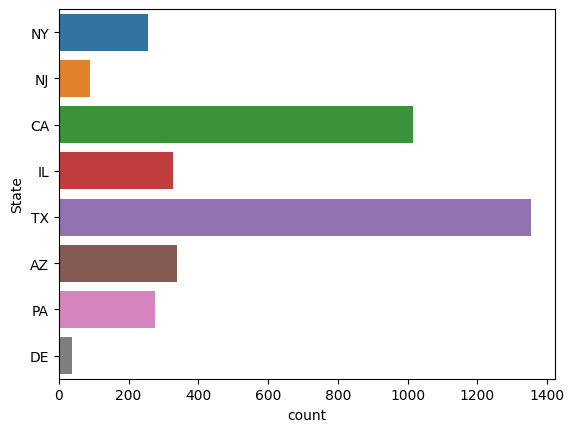

In [48]:
sns.countplot(y='State', data=Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Avg_Salary'>

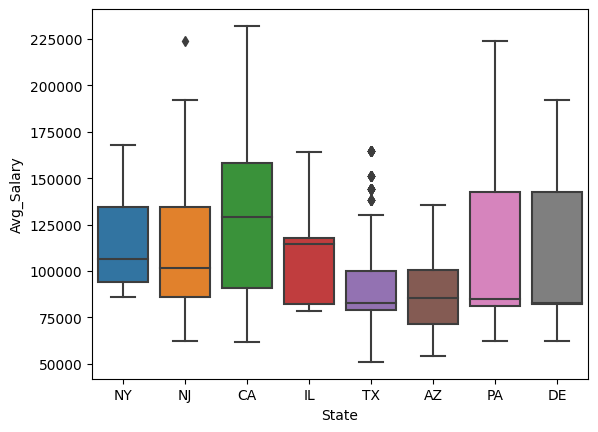

In [49]:
sns.boxplot(x= 'State', y= 'Avg_Salary', data= Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Min_Salary'>

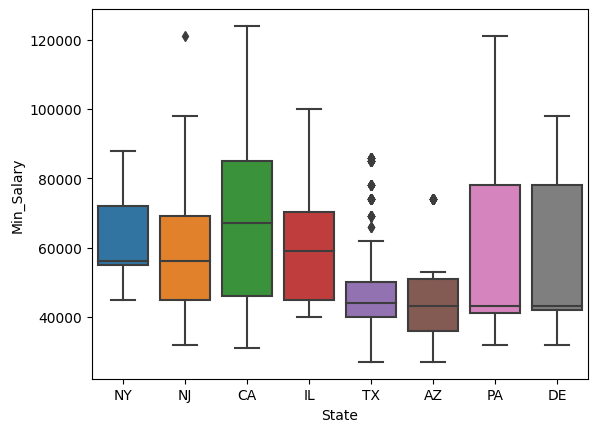

In [50]:
sns.boxplot(x= 'State', y= 'Min_Salary', data= Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Max_Salary'>

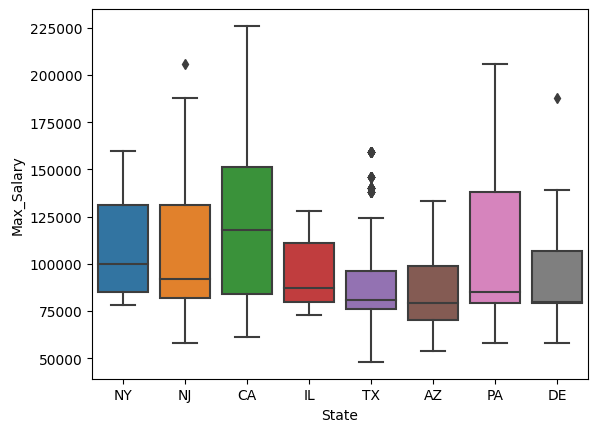

In [51]:
sns.boxplot(x= 'State', y= 'Max_Salary', data= Biz_df_clean)

<AxesSubplot: xlabel='State', ylabel='Rating'>

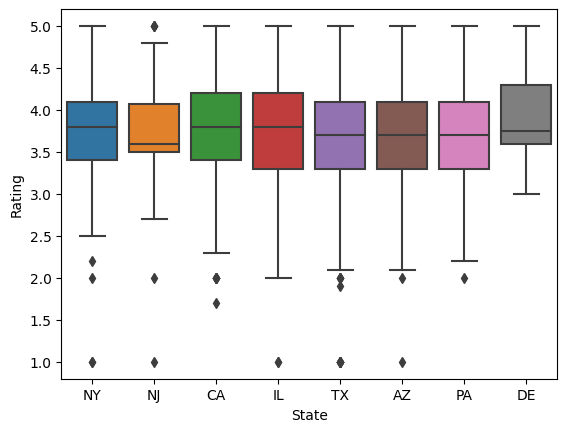

In [52]:
sns.boxplot(x= 'State', y= 'Rating', data= Biz_df_clean)

<AxesSubplot: xlabel='count', ylabel='Sector'>

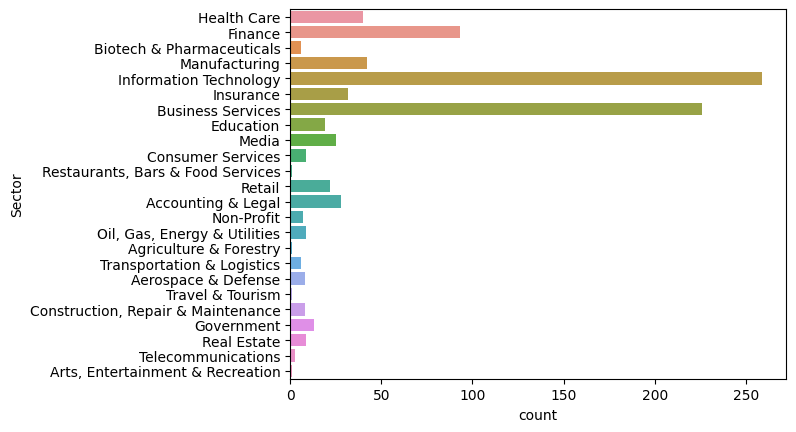

In [53]:
sns.countplot(y='Sector', data= Biz_df_clean[:1000:])

<AxesSubplot: xlabel='State', ylabel='count'>

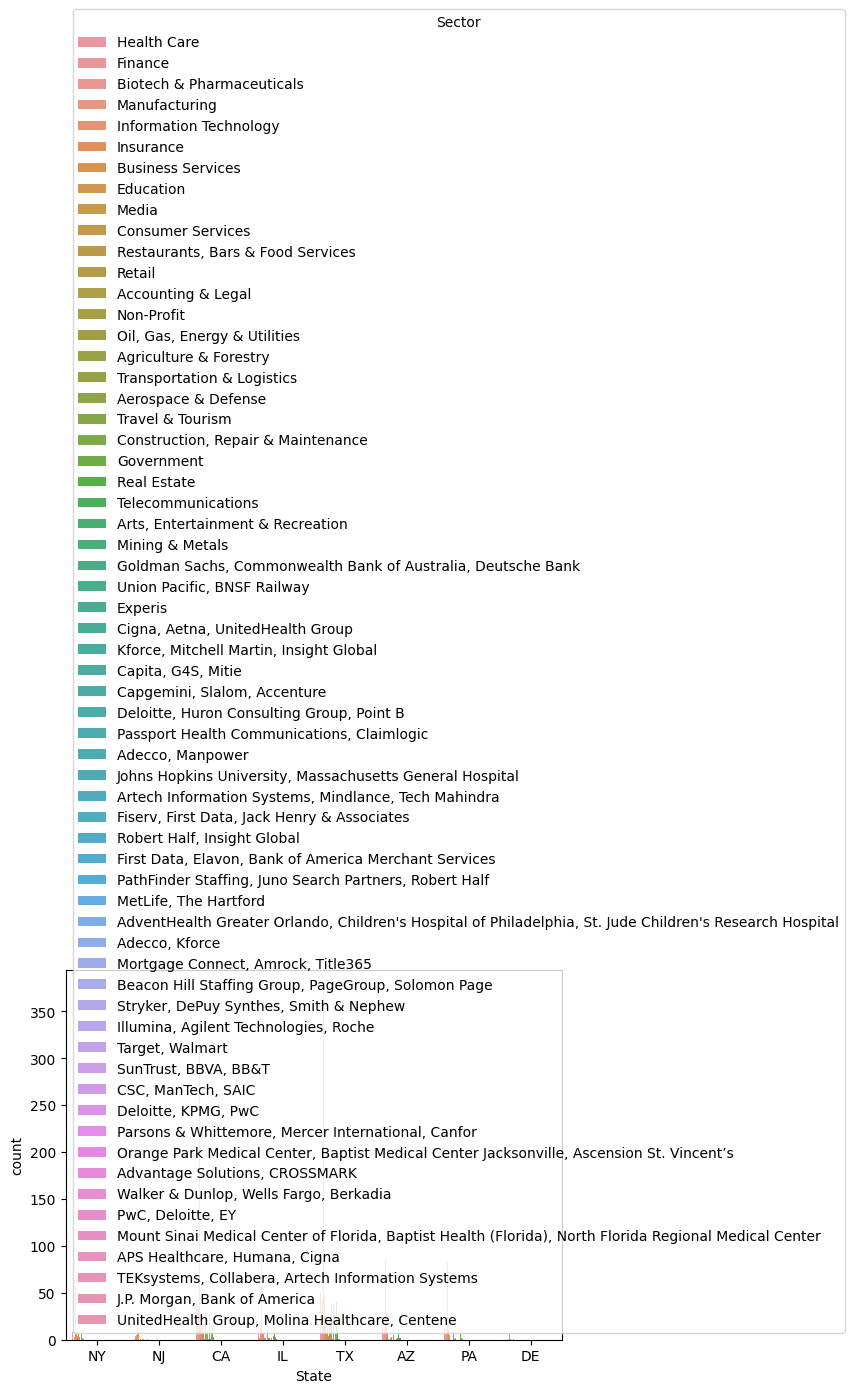

In [54]:
sns.countplot(x='State', hue='Sector', data=Biz_df_clean)

<AxesSubplot: xlabel='Avg_Salary', ylabel='Count'>

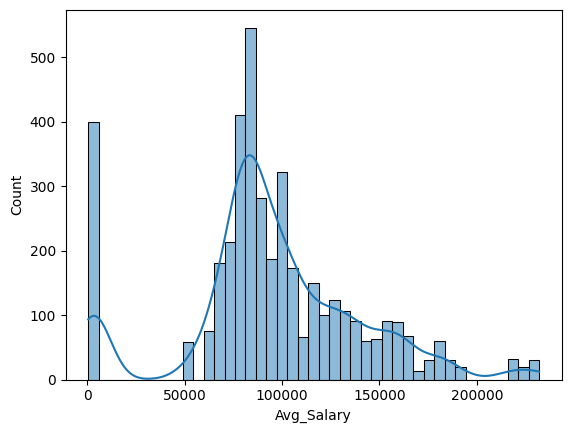

In [55]:
sns.histplot(Biz_df_clean['Avg_Salary'],  kde= True) 

<AxesSubplot: xlabel='Max_Salary', ylabel='Count'>

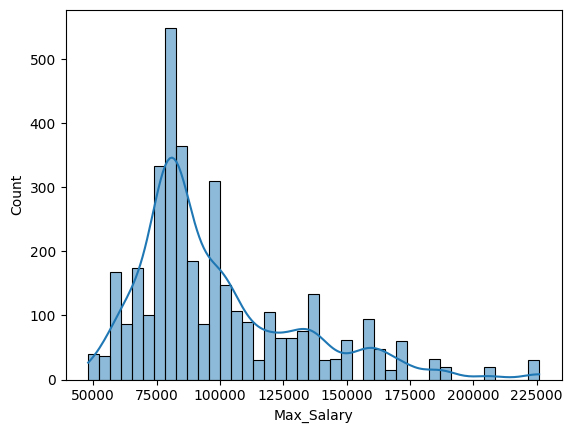

In [56]:
sns.histplot(Biz_df_clean['Max_Salary'], kde= True) 

<AxesSubplot: xlabel='Min_Salary', ylabel='Count'>

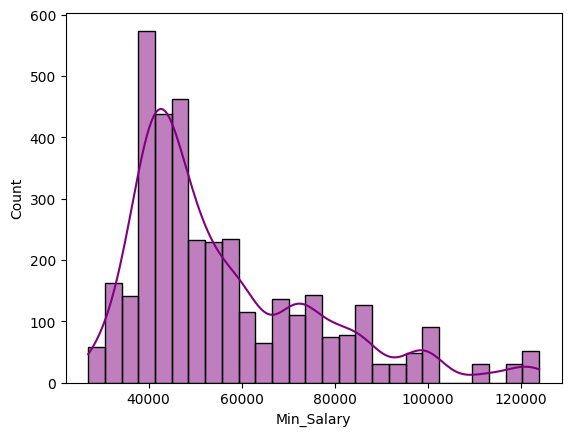

In [57]:
sns.histplot(Biz_df_clean['Min_Salary'], color='purple', kde= True) 

<AxesSubplot: >

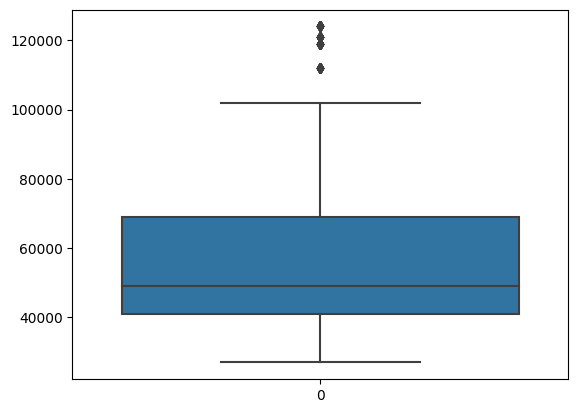

In [58]:
sns.boxplot(Biz_df_clean['Min_Salary']) 